### Step 0 :Imports and Reading Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../EDA/StudentsPerformance.csv')

### Step 1 : Data Understanding 
- Dataframe `shape` 
- `head` and `tail` 
- `dtypes` 
- `describe`

In [4]:
df.shape

(1000, 8)

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.sample(5)
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


----

### Step 2 :Data Cleaning

In [16]:
# Check for duplicate rows
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

> There is no missing values in the dataset.

In [46]:
# check for duplicates
df.duplicated().sum()
df = df.drop_duplicates()

In [47]:
#total score 
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df.head()

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,218
1,female,group C,some college,standard,completed,69,90,88,82.333333,247
2,female,group B,master's degree,standard,none,90,95,93,92.666667,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,148
4,male,group C,some college,standard,none,76,78,75,76.333333,229


In [48]:
#average score
df['average score'] = df['total score'] / 3
df.head()

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,218
1,female,group C,some college,standard,completed,69,90,88,82.333333,247
2,female,group B,master's degree,standard,none,90,95,93,92.666667,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,148
4,male,group C,some college,standard,none,76,78,75,76.333333,229


----

### Step 2 : Univariate Analysis
#### For numirical variables
 Insights:
- Are students doing better in reading/writing than math?

- Is the distribution normal or skewed?

> For numerical variables :
- Histograms

1. Math score distribution

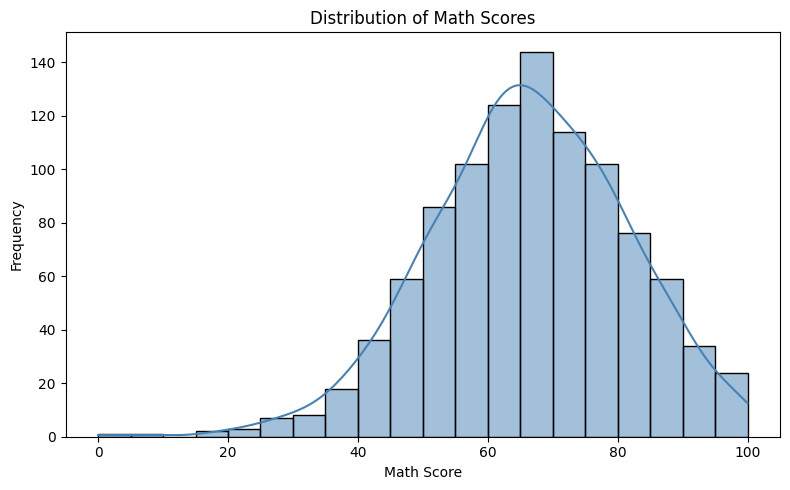

In [ ]:
# Math score distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='math score', bins=20, kde=True, color='steelblue')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

2. Reading score distribution

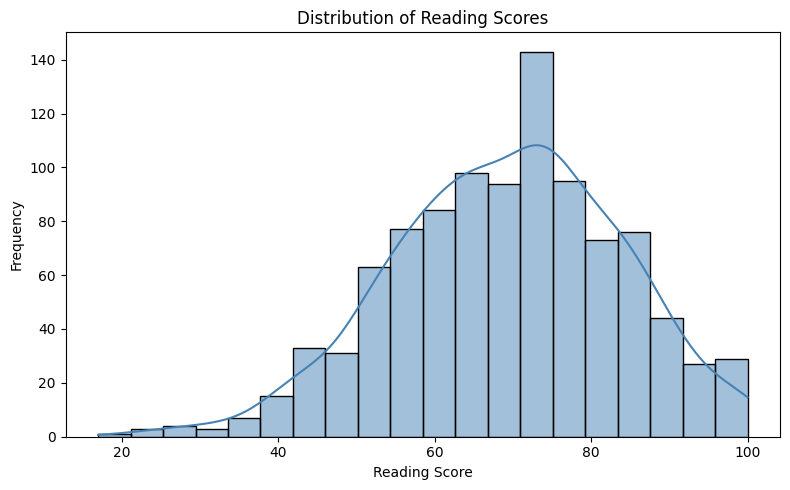

In [22]:
# Reading score distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='reading score', bins=20, kde=True, color='steelblue')
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()  

3. Writing score distribution

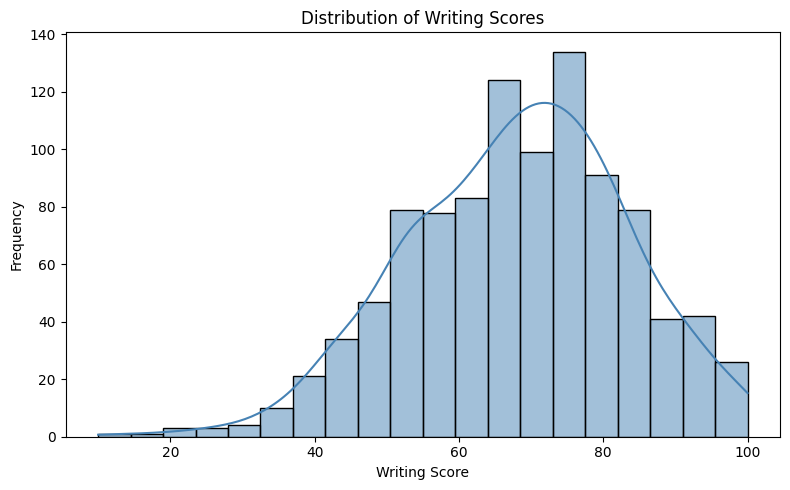

In [23]:
# writing score distribution
plt.figure(figsize=(8,5))   
sns.histplot(data=df, x='writing score', bins=20, kde=True, color='steelblue')
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()      

4. Average scores

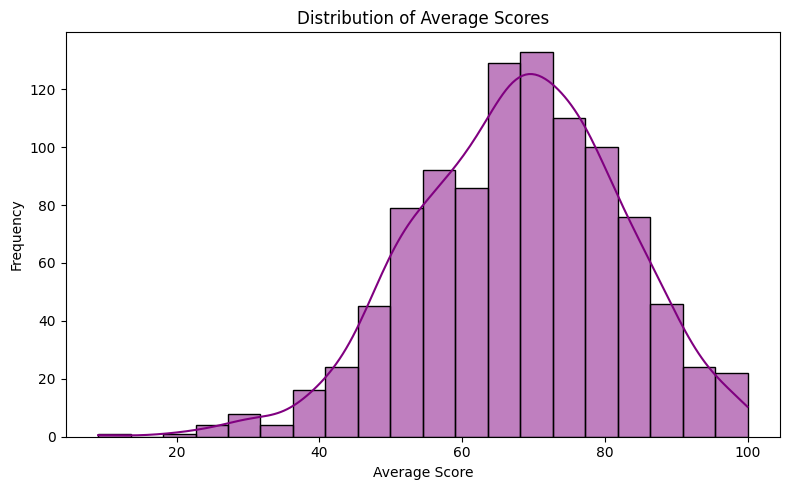

In [50]:
# Average scores distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='average score', bins=20, kde=True, color='purple')
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### For categorical variables

Insights:

- Are there more female or male students?

- Which race group is most represented?

- How many completed test preparation?

> For categorical variables :
- Count plots

1. Gender distribution 

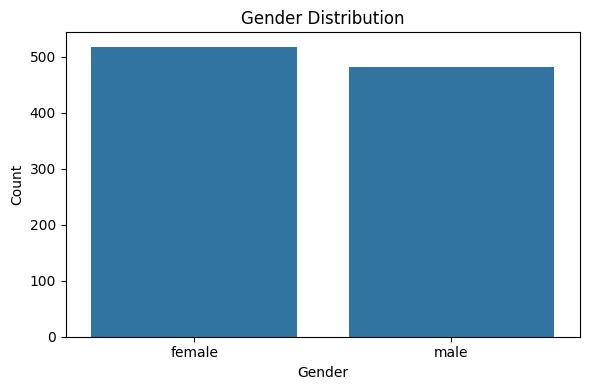

In [28]:
# gender distribution count plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

2. Race distribution

In [38]:
# Before count plot i want to rename race/ethnicity column
df.rename(columns={'race/ethnicity':
 'race'}, inplace=True)
df.columns

Index(['gender', 'race', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average score'],
      dtype='object')

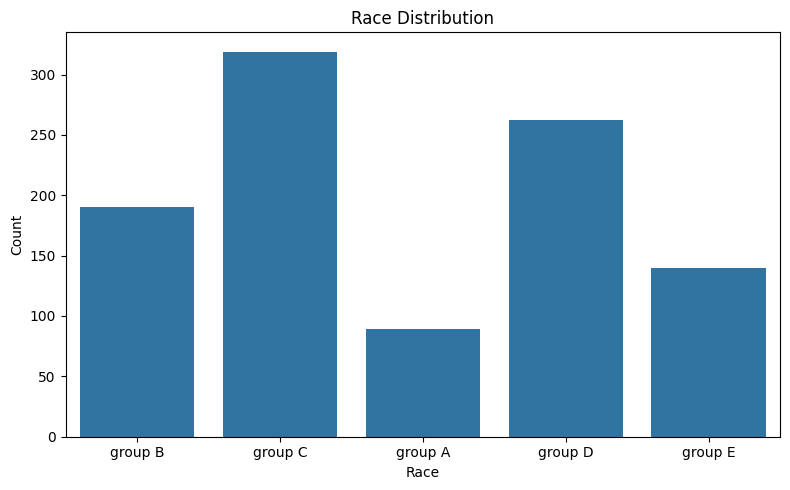

In [37]:

# Race distribution count plot
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='race')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

3. Lunch type distribution

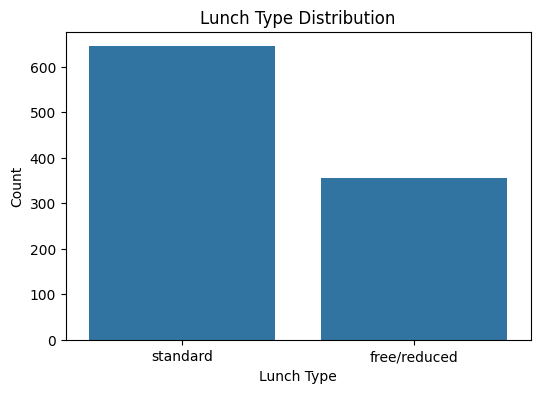

In [39]:
# lunch type distribution count plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='lunch')   
plt.title('Lunch Type Distribution')
plt.xlabel('Lunch Type')    
plt.ylabel('Count')
plt.show()  

4. Test preparation course completion

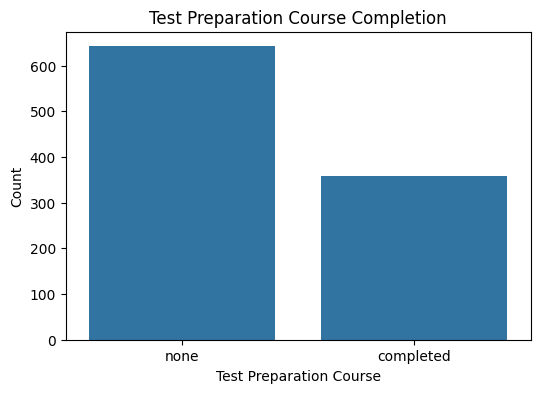

In [41]:
# Test preparation course completion count plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='test preparation course')   
plt.title('Test Preparation Course Completion')
plt.xlabel('Test Preparation Course')    
plt.ylabel('Count')
plt.show()  

5. Parental level of education

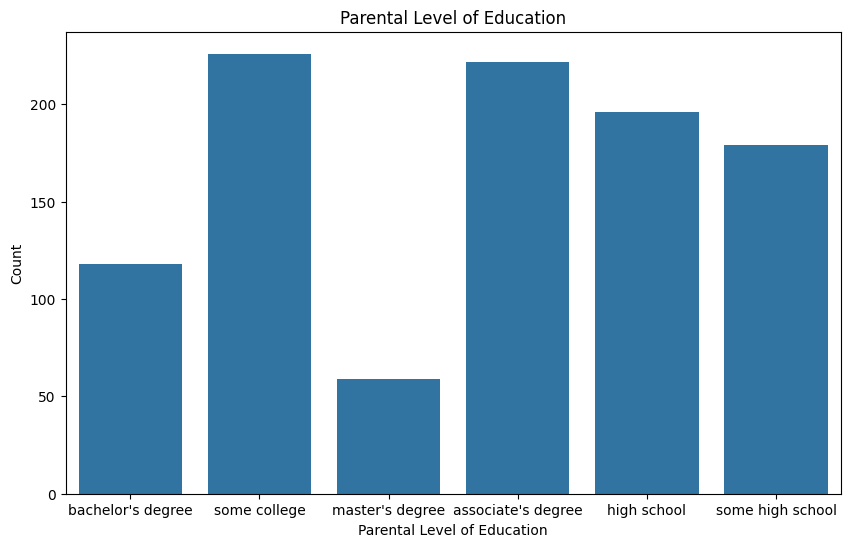

In [42]:
# parental level of education count plot
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='parental level of education')   
plt.title('Parental Level of Education')
plt.xlabel('Parental Level of Education')    
plt.ylabel('Count')
plt.show()  

### Step 3 : Bivariate Analysis
#### Gender vs Scores
 Insights:
- Females often score higher in reading and writing.

- Males may do slightly better in math.

1.  gender vs math


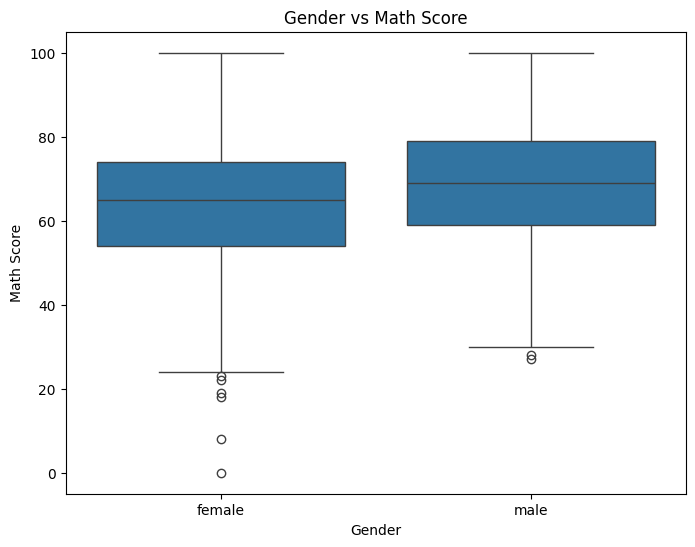

In [ ]:
#gender vs math and gender vs reading and gender vs writing
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='gender', y='math score')
plt.title('Gender vs Math Score')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()  

2. gender vs reading

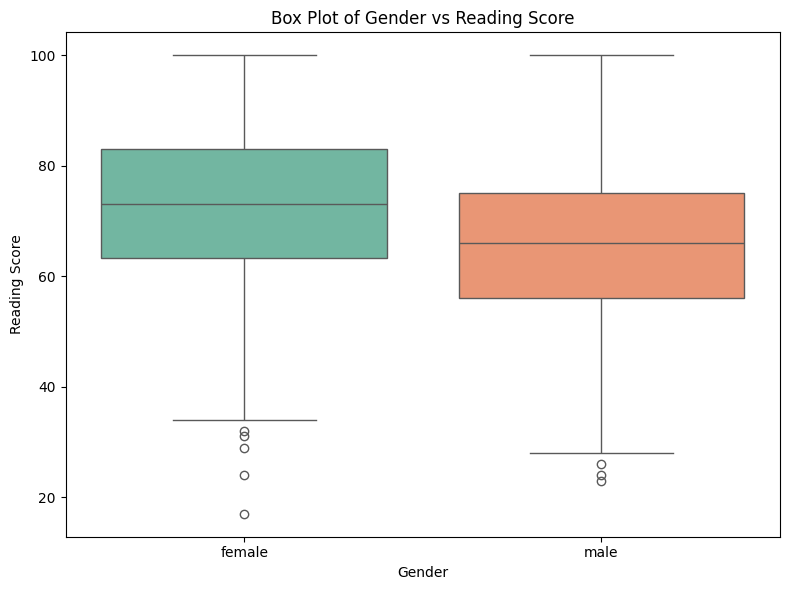

In [56]:
# gender vs reading
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='gender', y='reading score', hue='gender', palette='Set2', legend=False)
plt.title('Box Plot of Gender vs Reading Score')
plt.xlabel('Gender')
plt.ylabel('Reading Score')
plt.tight_layout()
plt.show()

3. gender vs writing

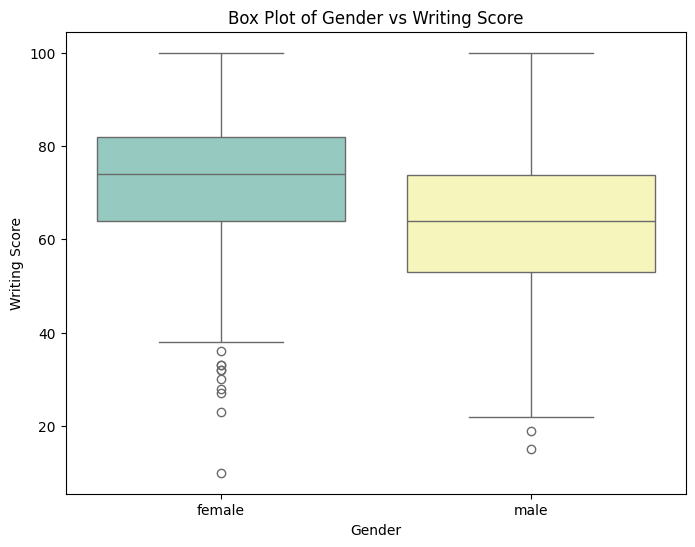

In [57]:
# gender vs writing 
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='gender', y='writing score', hue='gender', palette='Set3', legend=False)
plt.title('Box Plot of Gender vs Writing Score')
plt.xlabel('Gender')                        
plt.ylabel('Writing Score')
plt.show()

#### Lunch vs Scores
 Insights:
 - Standard lunch → higher scores

- Free/reduced lunch → lower scores
 `This reflects socio-economic status.`
 1. lunch vs math

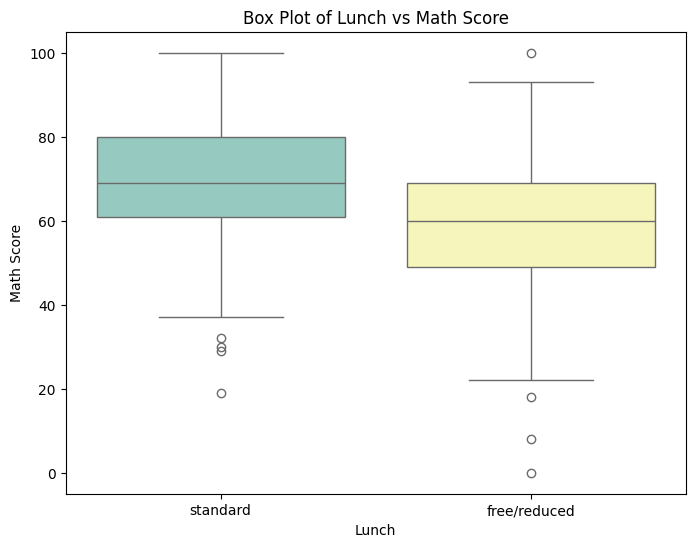

In [58]:
#lunch vs math 
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='lunch', y='math score', hue='lunch', palette='Set3', legend=False)
plt.title('Box Plot of Lunch vs Math Score')
plt.xlabel('Lunch')                        
plt.ylabel('Math Score')
plt.show()

2. lunch vs reading


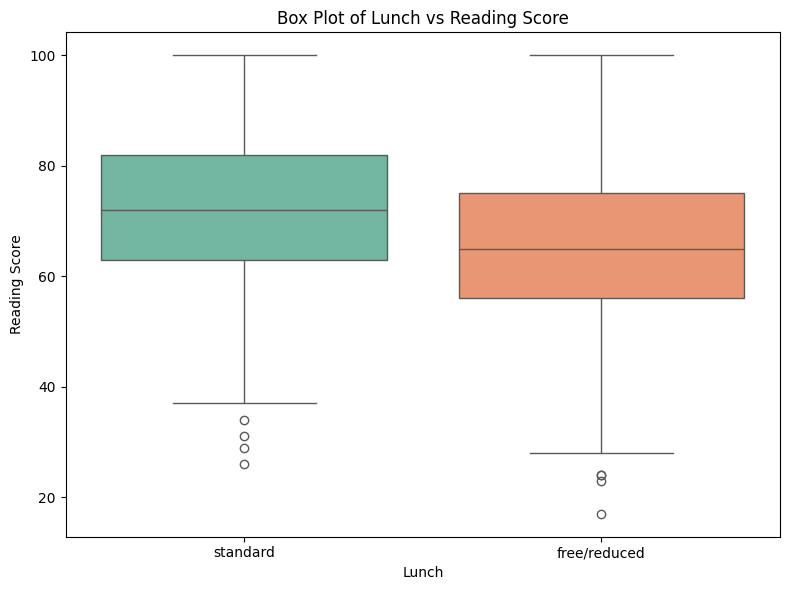

In [59]:
#lunch vs reading
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='lunch', y='reading score', hue='lunch', palette='Set2', legend=False)
plt.title('Box Plot of Lunch vs Reading Score')
plt.xlabel('Lunch')
plt.ylabel('Reading Score')
plt.tight_layout()
plt.show()

3. lunch vs writing

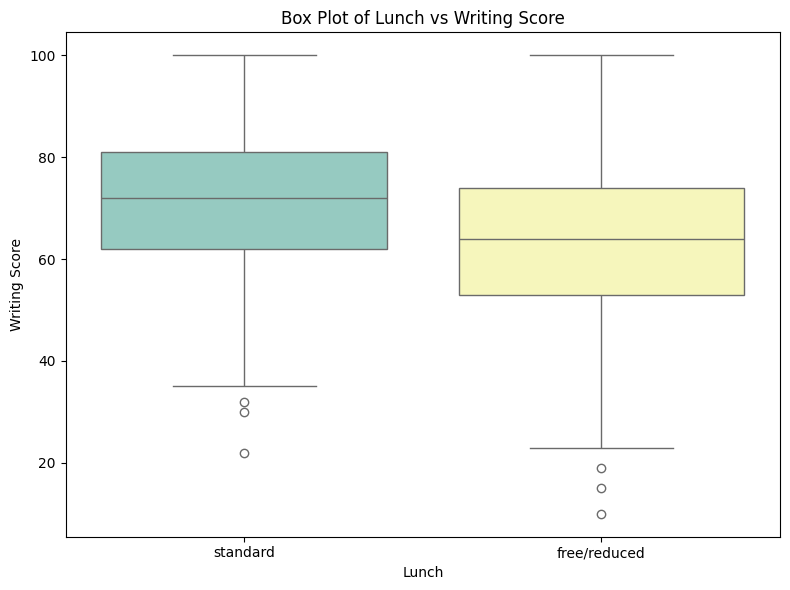

In [60]:
# lunch vs writing
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='lunch', y='writing score', hue='lunch', palette='Set3', legend=False)
plt.title('Box Plot of Lunch vs Writing Score')
plt.xlabel('Lunch')
plt.ylabel('Writing Score')
plt.tight_layout()
plt.show()

#### Test Preparation vs Scores
 Insights:
 - Completed test prep → higher scores
1. test preparation vs math

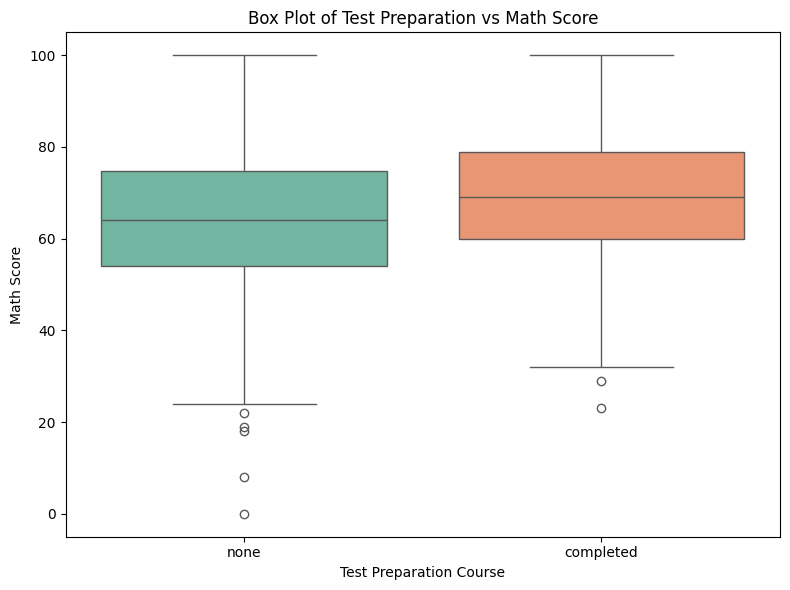

In [61]:
# test preparation vs math
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='test preparation course', y='math score', hue='test preparation course', palette='Set2', legend=False)
plt.title('Box Plot of Test Preparation vs Math Score')
plt.xlabel('Test Preparation Course')
plt.ylabel('Math Score')
plt.tight_layout()
plt.show()

2. test preparation vs reading

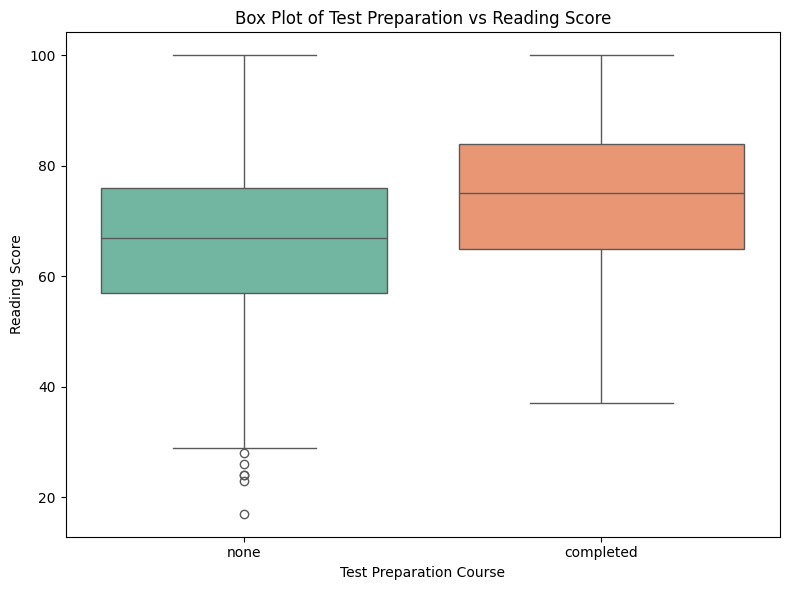

In [ ]:
# test preparation vs reading 
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='test preparation course', y='reading score', hue='test preparation course', palette='Set2', legend=False)
plt.title('Box Plot of Test Preparation vs Reading Score')
plt.xlabel('Test Preparation Course')
plt.ylabel('Reading Score')
plt.tight_layout()
plt.show() 

3. test preparation vs writing

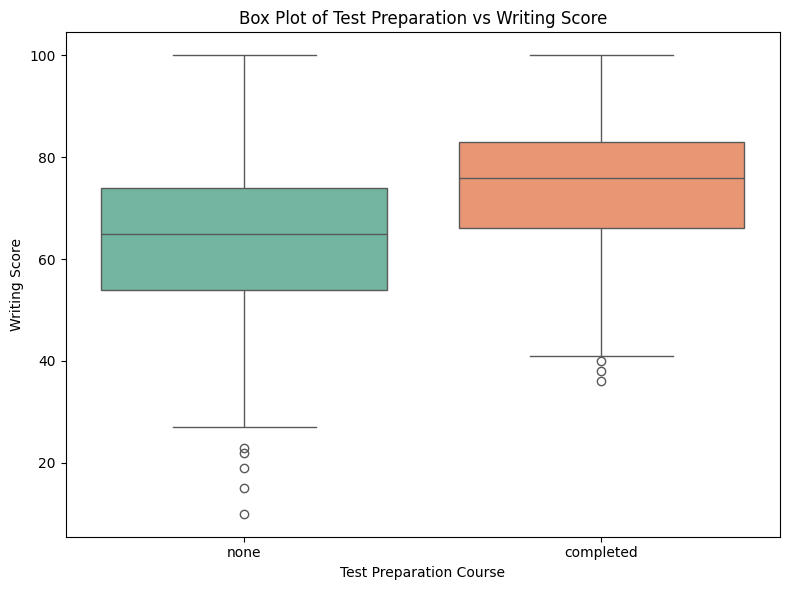

In [64]:
# test preparation vs writing
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='test preparation course', y='writing score', hue='test preparation course', palette='Set2', legend=False)
plt.title('Box Plot of Test Preparation vs Writing Score')
plt.xlabel('Test Preparation Course')
plt.ylabel('Writing Score')
plt.tight_layout()
plt.show()